## Importing libraries we'll need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Loading the file

In [2]:
df = pd.read_csv(r'P:\ENGINEERING\FPO\Digitalisation\1 FPO Projects\IIX Data Analytics\02-General presentations\Knowledge folder - preparation\Data Science Learning Framework\Machine Learning Posters\2 - Linear Regression\Lin_reg.csv')
df_test = df.iloc[6000:,:].copy() #separating test data (the last 884 flights) to evaluate the success of our model
df.head() #checking what our data looks like, we have take-off weight (t), mission range (nm) and fuel burn (kg)

# NOTE: This example doesn't use mean mach, but you can add it for a more accurate prediction if you'd like!

,take_off_weight,fuel_burn_total2,mean_cruise_mach,total_mission_great_circle_nm
0,73.173203,5751.545898,0.772134,662.158601
1,76.674927,3864.602539,0.777653,356.277530
2,67.857124,6549.867188,0.766548,1066.726470
3,66.460068,6041.843994,0.763281,842.082199
4,61.434284,3465.442139,0.761506,309.327138


## Formatting the data

In [3]:
df["constant"] = 1 #adding a column to calculate theta_0
#creating a separate dataframe with our features, what we're going to use to predict fuel burn
X = df[["constant",'total_mission_great_circle_nm','take_off_weight']].copy()
y = df['fuel_burn_total2'] #creating a dataframe with our labels, values we're trying to predict

#scaling our data, if take-off weight and mission range are roughly the same magnitude, the model will converge faster
for col in X.columns[1:]:
    X.loc[:,col] = (X.loc[:,col]-np.mean(X.loc[:,col]))/(np.max(X.loc[:,col])-np.min(X.loc[:,col]))

#converting to numpy arrays for easier indexing and manipulation
X = np.array(X)
y = np.array(y)
#separating normalised, matrix data into the same train test split
X, X_test, y, y_test = X[:5999][:], X[6000:][:], y[:5999][:], y[6000:][:]

## Performing Gradient Descent

In [4]:
grad_desc_iterations = 100 #setting number of iterations
J = np.zeros((grad_desc_iterations,1)) #creating empty matrix to fill with cost at each iteration
thetas = np.zeros((grad_desc_iterations+1,3)) #creating empty matrix of thetas at each iteration, the last row will be best fit for model
alpha = 0.8 #setting the learning rate

for i in range(grad_desc_iterations): #for each gradient descent iteration...
    J[i] = (float(1)/2*len(X))*np.sum((thetas[i,0] + thetas[i,1]*X[:,1] + thetas[i,2]*X[:,2]-y)**2) #calculate the cost
    for j in range(X.shape[1]): #for each feature...
        #perform gradient descent to find the value of theta_0,1,2 for the next iteration
        thetas[i+1,j] = thetas[i,j]-(alpha/len(X))*sum((thetas[i,0] + thetas[i,1]*X[:,1] + thetas[i,2]*X[:,2]-y)*X[:,j])

## Plotting the cost

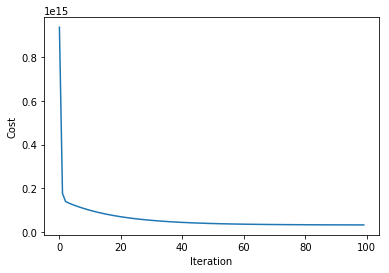

In [5]:
plt.plot(range(grad_desc_iterations), J) #plotting iterations vs. cost (J)
plt.xlabel("Iteration")
plt.ylabel("Cost")

## Predicting fuel burn for the test data

In [6]:
thetas[-1] #Checking our final theta values
df_test['fuel_burn_pred'] = thetas[-1,0] + X_test[:,1]*thetas[-1,1] + X_test[:,2]*thetas[-1,2] #predicting fuel burn for test data

## Plotting results

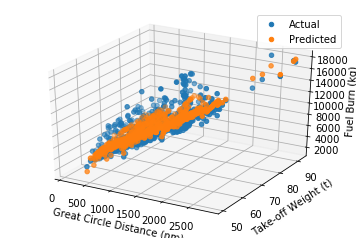

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = df_test['total_mission_great_circle_nm'], ys = df_test['take_off_weight'], zs = df_test['fuel_burn_total2'])
ax.scatter(xs = df_test['total_mission_great_circle_nm'], ys = df_test['take_off_weight'], zs = df_test['fuel_burn_pred'])
ax.set_xlabel("Great Circle Distance (nm)")
ax.set_ylabel("Take-off Weight (t)")
ax.set_zlabel("Fuel Burn (kg)")
plt.legend(["Actual", "Predicted"])